In [1]:
!pip install qiskit qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.2 MB/s eta 0:00:00


In [2]:
from math import pi
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [3]:
# Initialize simulator
sim = AerSimulator()


In [4]:
# -----------------------------
# Swap X and H gates
# -----------------------------
qc_swap = QuantumCircuit(1, 1)
qc_swap.h(0)       # Hadamard first
qc_swap.x(0)       # Then X
qc_swap.s(0)
qc_swap.t(0)
qc_swap.rz(0.5, 0)
qc_swap.measure_all()

compiled = transpile(qc_swap, sim)
result = sim.run(compiled, shots=1024).result()
counts_swap = result.get_counts()

print("1️⃣ Circuit with X and H swapped:")
print(qc_swap.draw())
print("Measurement Counts:", counts_swap)

1️⃣ Circuit with X and H swapped:
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ H ├┤ X ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 
Measurement Counts: {'1 0': 508, '0 0': 516}


In [5]:
# -----------------------------
# Vary RZ rotation angle
# -----------------------------
angles = [pi/4, pi/2, pi]
counts_angles = {}

for theta in angles:
    qc_angle = QuantumCircuit(1, 1)
    qc_angle.x(0)
    qc_angle.h(0)
    qc_angle.s(0)
    qc_angle.t(0)
    qc_angle.rz(theta, 0)
    qc_angle.measure_all()

    compiled = transpile(qc_angle, sim)
    result = sim.run(compiled, shots=1024).result()
    counts = result.get_counts()
    counts_angles[theta] = counts

    print(f"\n2️⃣ Circuit with RZ rotation θ = {theta} radians:")
    print(qc_angle.draw())
    print("Measurement Counts:", counts)


2️⃣ Circuit with RZ rotation θ = 0.7853981633974483 radians:
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ S ├┤ T ├┤ Rz(π/4) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 
Measurement Counts: {'0 0': 536, '1 0': 488}

2️⃣ Circuit with RZ rotation θ = 1.5707963267948966 radians:
        ┌───┐┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ S ├┤ T ├┤ Rz(π/2) ├─░─┤M├
        └───┘└───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/═══════════════════════════════════╬═
                                           ║ 
meas: 1/═══════════════════════════════════╩═
                                           0 
Measurement Counts: {'1 0': 493, '0 0': 531}

2️⃣ Circuit with RZ rotation θ = 3.141592653589793 radians:
        ┌───┐┌───┐┌───┐┌───┐┌───────┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ S ├┤ T ├┤ Rz(π) ├

In [6]:
# -----------------------------
# Remove Hadamard gate
# -----------------------------
qc_no_h = QuantumCircuit(1, 1)
qc_no_h.x(0)       # X gate
# qc_no_h.h(0)     # Hadamard removed
qc_no_h.s(0)
qc_no_h.t(0)
qc_no_h.rz(0.5, 0)
qc_no_h.measure_all()

compiled = transpile(qc_no_h, sim)
result = sim.run(compiled, shots=1024).result()
counts_no_h = result.get_counts()

print("\n3️⃣ Circuit without Hadamard:")
print(qc_no_h.draw())
print("Measurement Counts:", counts_no_h)



3️⃣ Circuit without Hadamard:
        ┌───┐┌───┐┌───┐┌─────────┐ ░ ┌─┐
     q: ┤ X ├┤ S ├┤ T ├┤ Rz(0.5) ├─░─┤M├
        └───┘└───┘└───┘└─────────┘ ░ └╥┘
   c: 1/══════════════════════════════╬═
                                      ║ 
meas: 1/══════════════════════════════╩═
                                      0 
Measurement Counts: {'1 0': 1024}


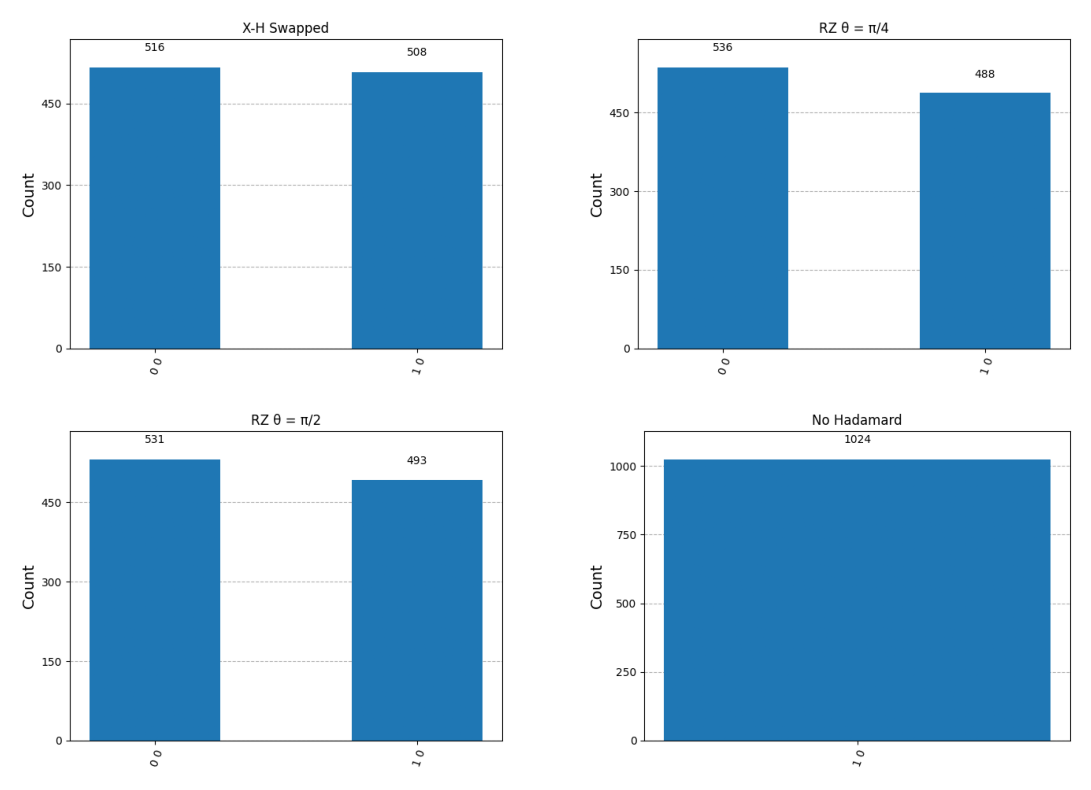

In [7]:
# -----------------------------
# Plot histograms properly
# -----------------------------
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Helper to plot in a specific axis
def plot_in_axis(counts, ax, title):
    hist = plot_histogram(counts, title=title)
    hist.savefig("temp.png")   # Save to temporary file
    img = plt.imread("temp.png")
    ax.imshow(img)
    ax.axis('off')

plot_in_axis(counts_swap, axs[0,0], "X-H Swapped")
plot_in_axis(counts_angles[pi/4], axs[0,1], "RZ θ = π/4")
plot_in_axis(counts_angles[pi/2], axs[1,0], "RZ θ = π/2")
plot_in_axis(counts_no_h, axs[1,1], "No Hadamard")

plt.tight_layout()
plt.show()